# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [2]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

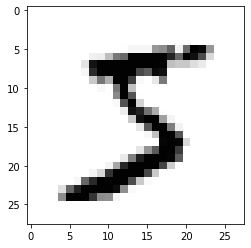

In [6]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape((28, 28))).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [4]:
y_train.shape

(60000,)

In [8]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [10]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [21]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim = 784, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

내가 만든 모델을 확인해 봅시다.

In [25]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [23]:
model.fit(x_train, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2928 - accuracy: 0.9140 - val_loss: 0.1496 - val_accuracy: 0.9557
Epoch 2/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1316 - accuracy: 0.9606 - val_loss: 0.1236 - val_accuracy: 0.9646
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0940 - accuracy: 0.9715 - val_loss: 0.1044 - val_accuracy: 0.9697
Epoch 4/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.0963 - val_accuracy: 0.9720
Epoch 5/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0911 - val_accuracy: 0.9722


95%이상의 성능을 가진 모델을 만들면 완성!

In [24]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0769 - accuracy: 0.9764 - 756ms/epoch - 2ms/step

Accuracy: 0.9764000177383423


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)